# **MASACHE , RUIZ AVANCE PROYECTO **

# **Libraries**

In [1]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
"de nuestra carpeta dinde guardamos y quitamos el fondo ahora realizaremo
 "el conteo de las categorias exustentes".

fpath = 'C:/Users/nando/Desktop/panasIAfondo/'
random_seed = 9

categories = os.listdir(fpath)
print("List of categories = ",categories,"\n\nNo. of categories = ", len(categories))

List of categories =  ['ArielChabla', 'BarraganSteven', 'GenesisHeredia', 'JorgeBorrero', 'JoseRuiz', 'RaymondDávila'] 

No. of categories =  6


In [3]:
" define las varible load_images_and_labels(categories):"
" img_lst=[] , labels=[]"

def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category):
            img = cv2.imread(fpath+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            img_array = Image.fromarray(img, 'RGB')
            
            img_lst.append(np.array(img_array))
            
            labels.append(index)
    return img_lst, labels
"Imprime la categoria y numero de imagen como tambien su etiqueta"

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))

No. of images loaded =  123 
No. of labels loaded =  123
<class 'list'> <class 'list'>


In [5]:
"images = np.array(images)"
"labels = np.array(labels)"

images = np.array(images)
labels = np.array(labels)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (123,) 
Labels shape =  (123,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


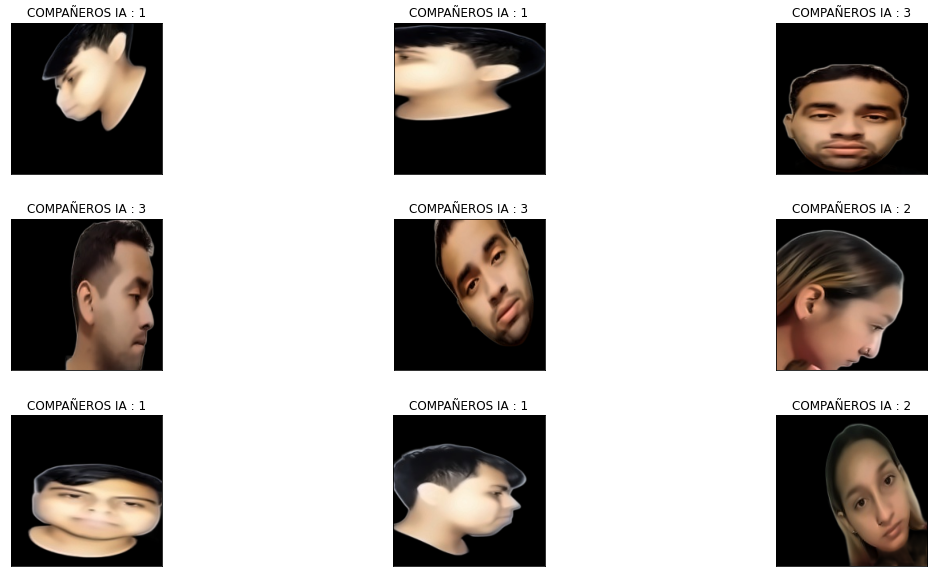

In [6]:
"se define el display_rand_images(images, labels):""
 "  plt.figure(1 , figsize = (19 , 10))"

def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        
        plt.title('COMPAÑEROS IA : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
    
display_rand_images(images, labels)

# **Prepare data for training the CNN model**

In [7]:
#1-step in data shuffling

#get equally spaced numbers in a given range
n = np.arange(images.shape[0])
print("'n' values before shuffling = ",n)

#shuffle all the equally spaced values in list 'n'
np.random.seed(random_seed)
np.random.shuffle(n)
print("\n'n' values after shuffling = ",n)

'n' values before shuffling =  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122]

'n' values after shuffling =  [101   3  28  81  10  39  21  43  69  55  47 112  68  75  20  35 121 102
  26  83  23  25  79 100   6 107  66  31  64  99  61  57  53 105  94  14
  36  71 104  32  17  72  42  41  67  90  29   2  38  46  48  15  78   7
  98  51  44  27  45  34  96  73   8  85  70  82  30 109  24   5  76  16
  89 108  84 115   4 113  50 116  87 120  77 111  58 106  13  63  49  95
  80   9  19  37  11  97   1 103  86  18  12  62 110 119  74  88 114  60


In [8]:
#2-step in data shuffling

#shuffle images and corresponding labels data in both the lists


images = images[n]
labels = labels[n]

print("Images shape after shuffling = ",images.shape,"\nLabels shape after shuffling = ",labels.shape)

Images shape after shuffling =  (123,) 
Labels shape after shuffling =  (123,)


In [ ]:
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/14
print("Images shape after normalization = ",images.shape)

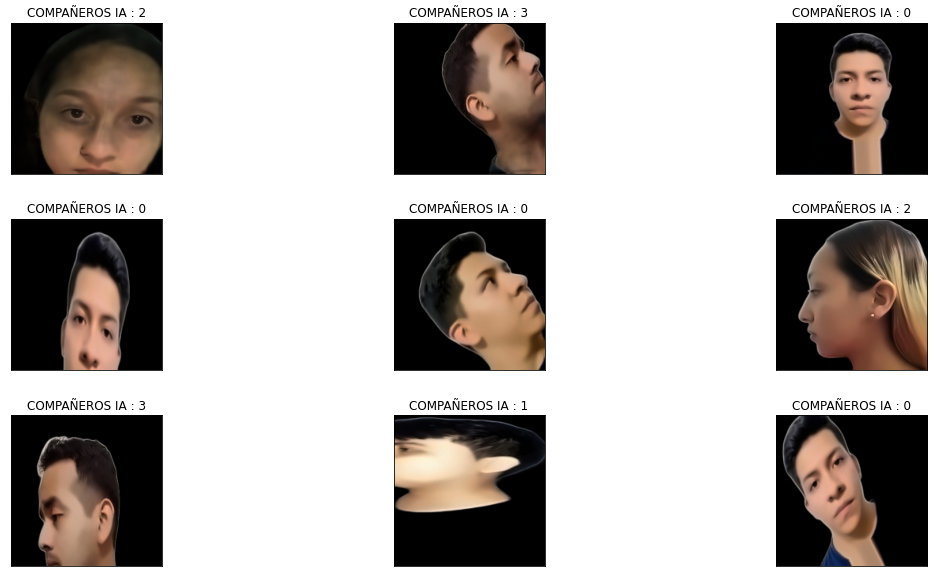

In [10]:
display_rand_images(images, labels)

In [11]:
"train_ds, test_ds, train_labels, test_labels = train_test_split"
"(images, labels, test_size = 0.2, random_state = random_seed)"

train_ds, test_ds, train_labels, test_labels = train_test_split(images, labels, test_size = 0.2, random_state = random_seed)

print("train_ds shape = ",train_ds.shape)
print("train_labels shape = ",train_labels.shape)
print("\ntest_ds shape = ",test_ds.shape)
print("test_labels shape = ",test_labels.shape)

train_ds shape =  (98,)
train_labels shape =  (98,)

test_ds shape =  (25,)
test_labels shape =  (25,)


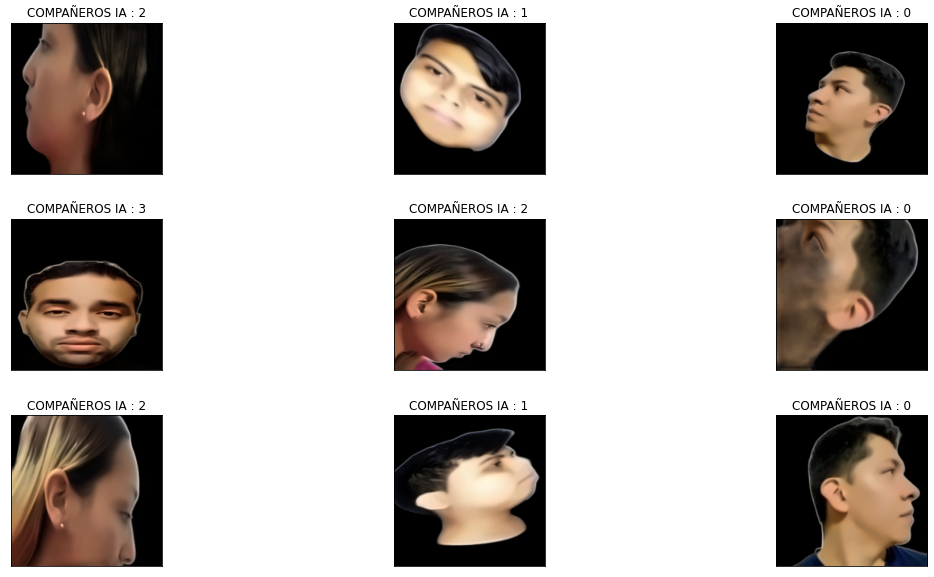

In [12]:
display_rand_images(train_ds, train_labels)

In [ ]:
## Resizing images
train_ds = tf.image.resize(train_ds, (150, 150))
test_ds = tf.image.resize(test_ds, (150, 150))

# **Define CNN model**

In [ ]:
## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=train_ds[0].shape)
base_model.trainable = False ## Not trainable weights

## Preprocessing input
train_ds = preprocess_input(train_ds) 
test_ds = preprocess_input(test_ds)

Modelo: "vgg16"
_________________________________________________________________
 Número de parámetro de forma de salida de capa (tipo)   
================================================== ===============
 entrada_1 (Capa de entrada) [(Ninguno, 192, 192, 3)] 0         
                                                                 
 block1_conv1 (Conv2D) (Ninguno, 192, 192, 64) 1792      
                                                                 
 block1_conv2 (Conv2D) (Ninguno, 192, 192, 64) 36928     
                                                                 
 block1_pool (MaxPooling2D) (Ninguno, 96, 96, 64) 0         
                                                                 
 block2_conv1 (Conv2D) (Ninguno, 96, 96, 128) 73856     
                                                                 
 block2_conv2 (Conv2D) (Ninguno, 96, 96, 128) 147584    
                                                                 
 block2_pool (MaxPooling2D) (Ninguno, 48, 48, 128) 0         
                                                                 
 block3_conv1 (Conv2D) (Ninguno, 48, 48, 256) 295168    
                                                                 
 block3_conv2 (Conv2D) (Ninguno, 48, 48, 256) 590080    
                                                                 
 block3_conv3 (Conv2D) (Ninguno, 48, 48, 256) 590080    
                                                                 
 block3_pool (MaxPooling2D) (Ninguno, 24, 24, 256) 0         
                                                                 
 block4_conv1 (Conv2D) (Ninguno, 24, 24, 512) 1180160   
                                                                 
 block4_conv2 (Conv2D) (Ninguno, 24, 24, 512) 2359808   
                                                                 
 block4_conv3 (Conv2D) (Ninguno, 24, 24, 512) 2359808   
                                                                 
 block4_pool (MaxPooling2D) (Ninguno, 12, 12, 512) 0         
                                                                 
 block5_conv1 (Conv2D) (Ninguno, 12, 12, 512) 2359808   
                                                                 
 block5_conv2 (Conv2D) (Ninguno, 12, 12, 512) 2359808   
                                                                 
 block5_conv3 (Conv2D) (Ninguno, 12, 12, 512) 2359808   
                                                                 
 block5_pool (MaxPooling2D) (Ninguno, 6, 6, 512) 0         
                                                                 
================================================== ===============
Parámetros totales: 14.714.688
Parámetros entrenables: 0
Parámetros no entrenables: 14,714,688

In [ ]:
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(5, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

# **Train model**

In [ ]:
%%time

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

history = model.fit(train_ds, train_labels, epochs=50, validation_split=0.2, batch_size=32)

In [ ]:
_, acc = model.evaluate(test_ds, test_labels, verbose=0)

print('> %.2f' % (acc * 100.0))

In [ ]:
model_probs = model.predict(test_ds, verbose=0)
# predict crisp classes for test set
model_classes = np.argmax(model_probs,axis=1)
# reduce to 1d array
model_probs = model_probs[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(test_labels, model_classes)*100
# precision tp / (tp + fp)
precision = precision_score(test_labels, model_classes, average='weighted')*100
# recall: tp / (tp + fn)
recall = recall_score(test_labels, model_classes, average='weighted')*100
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_labels, model_classes, average='weighted')*100

print('Accuracy: %.2f' % accuracy)
print('F1 score: %.2f' % f1)
print('Precision: %.2f' % precision)
print('Recall: %.2f' % recall)

In [ ]:
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, validation_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()